In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/PhishingData.xlsx")

In [3]:
cols=['Result','SFH','Widnow','SSLfinal' ,'Request', 'Anchor',
       'Traffic','Length','Domain','IP',]
all_df=all_df[cols]

In [4]:
all_df[:2]

,Result,SFH,Widnow,SSLfinal,Request,Anchor,Traffic,Length,Domain,IP
0,0,1,-1,1,-1,-1,1,1,1,0
1,1,-1,-1,-1,-1,-1,0,1,1,1


In [5]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1353 train: 1072 test: 281


In [6]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

In [7]:
train_Features[:4]

array([[ 1, -1,  1, -1, -1,  1,  1,  1,  0],
       [-1, -1, -1, -1, -1,  0,  1,  1,  1],
       [ 1, -1,  0,  0, -1,  0, -1,  1,  0],
       [ 1,  0,  1, -1, -1,  0,  1,  1,  0]])

In [8]:
train_Label[:4]

array([0, 1, 1, 0])

In [9]:
train_Features.shape

(1072, 9)

In [10]:
train_Features = train_Features.reshape(train_Features.shape[0], 3, 3, 1)

In [11]:
train_Features.shape

(1072, 3, 3, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

Using TensorFlow backend.


In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(3,3,1), 
                 activation='relu'))

In [15]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [16]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [17]:
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(128, activation='tanh'))

In [20]:
model.add(Dropout(0.25))

In [21]:
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 3, 1000)        2000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 1000)        1001000   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 1000)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 1000)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1152128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [23]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 
model.fit(x=train_Features,y=train_Label)

Epoch 1/1
1072/1072 [==============================] - 20s 19ms/step - loss: 0.7414 - acc: 0.3181


In [24]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=100,verbose=1)

Train on 857 samples, validate on 215 samples
Epoch 1/10
857/857 [==============================] - 11s 13ms/step - loss: 0.6952 - acc: 0.3466 - val_loss: 0.6290 - val_acc: 0.3628
Epoch 2/10
857/857 [==============================] - 6s 6ms/step - loss: 0.6863 - acc: 0.3396 - val_loss: 0.6130 - val_acc: 0.4047
Epoch 3/10
857/857 [==============================] - 5s 6ms/step - loss: 0.6761 - acc: 0.3419 - val_loss: 0.6129 - val_acc: 0.3953
Epoch 4/10
857/857 [==============================] - 5s 6ms/step - loss: 0.6732 - acc: 0.3372 - val_loss: 0.6183 - val_acc: 0.3814
Epoch 5/10
857/857 [==============================] - 5s 6ms/step - loss: 0.6574 - acc: 0.3547 - val_loss: 0.5964 - val_acc: 0.3953
Epoch 6/10
857/857 [==============================] - 5s 6ms/step - loss: 0.6807 - acc: 0.3314 - val_loss: 0.6124 - val_acc: 0.3860
Epoch 7/10
857/857 [==============================] - 5s 6ms/step - loss: 0.6625 - acc: 0.3372 - val_loss: 0.5725 - val_acc: 0.4558
Epoch 8/10
857/857 [========

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

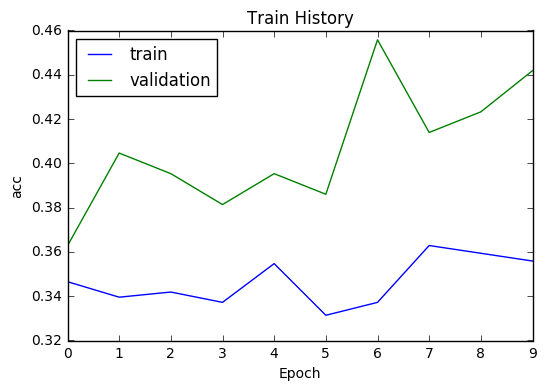

In [26]:
show_train_history(train_history,'acc','val_acc')

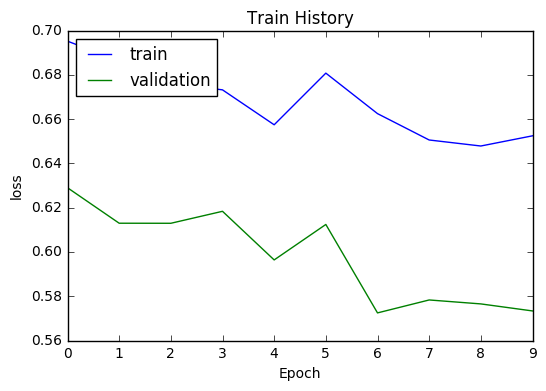

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
test_Features = test_Features.reshape(test_Features.shape[0], 3, 3, 1)

In [29]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

281/281 [==============================] - 0s 1ms/step


In [30]:
scores[1]

0.35943060508826447